In [1]:
import sys
sys.path.append('..')
from mtDNAsim import *
import pandas as pd
import numpy as np
from copy import deepcopy
from collections import Counter
import argparse
import phylovelo as pv
import pickle

/home/wangkun/mtDNA_simulation/scripts/../mtDNAsim/sim_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import matplotlib.pyplot as plt

In [3]:
phylo_tree, branch_colors = loadtree('/data3/wangkun/mtsim_res/240704/bifurcated_/21530/bif_tree_gt_21530.nwk')

In [40]:
mt_cn = {
    'mid':lambda x: 1.52 if x <= 10 else (2.85 if x <= 20 else 2),
    'const':lambda x: 2 
}

In [41]:
mt_muts, mutid = mtmutation(phylo_tree, mut_rate=0.0008, init_mut_rate=0.1, mt_copynumber=mt_cn['mid'], nmts=500)

  0%|          | 0/499 [00:00<?, ?it/s]

Simulating MT mutation::   0%|          | 0/20352 [00:00<?, ?it/s]

In [42]:
len(mt_muts)

20352

In [43]:
generation, n_mts = [], []
for cell in mt_muts.keys():
    generation.append(int(cell.split('_')[0][1:]))
    n_mts.append(len(mt_muts[cell]))

In [44]:
generation, n_mts = np.array(generation), np.array(n_mts)

Text(0, 0.5, 'number of mt genomes')

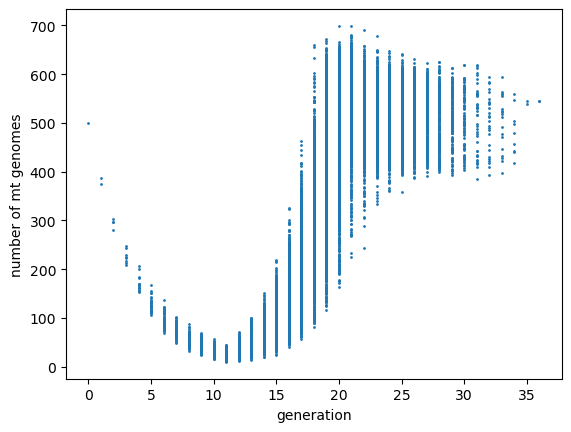

In [45]:
plt.scatter(generation, n_mts, s=1)
plt.xlabel('generation')
plt.ylabel('number of mt genomes')

Text(0.5, 0, 'number of mt genomes in 11st generation')

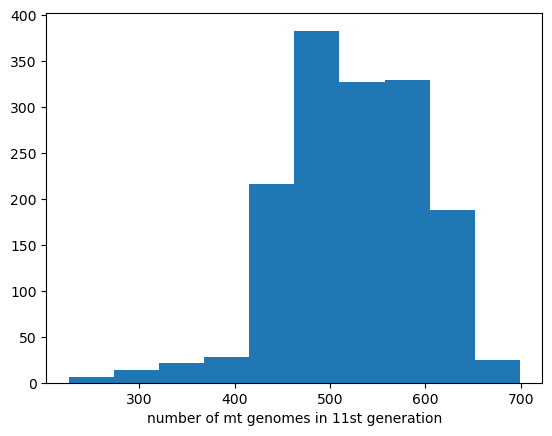

In [46]:
plt.hist(n_mts[generation==21])
plt.xlabel('number of mt genomes in 11st generation')

In [47]:
np.mean(n_mts[generation==20])

478.07849011384064

(array([  12.,   58.,  270.,  842., 1316., 1274.,  796.,  330.,   83.,
          19.]),
 array([ 6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.]),
 <BarContainer object of 10 artists>)

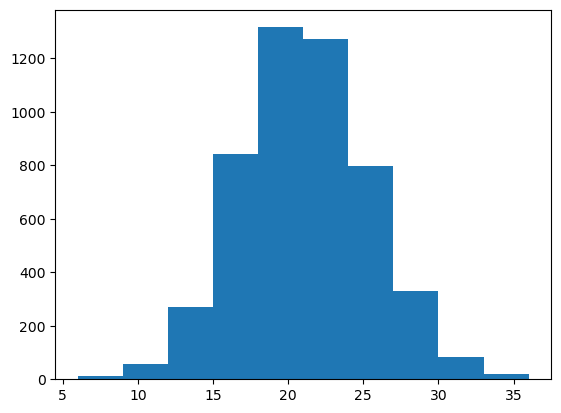

In [51]:
plt.hist([int(cell.name.split('_')[0][1:]) for cell in phylo_tree.get_terminals()])

In [52]:
np.mean([int(cell.name.split('_')[0][1:]) for cell in phylo_tree.get_terminals()])

20.597

  0%|          | 0/5255 [00:00<?, ?it/s]

  0%|          | 0/4448 [00:00<?, ?it/s]

  0%|          | 0/4836 [00:00<?, ?it/s]

  0%|          | 0/5065 [00:00<?, ?it/s]

  0%|          | 0/4818 [00:00<?, ?it/s]

  0%|          | 0/4245 [00:00<?, ?it/s]

  0%|          | 0/5186 [00:00<?, ?it/s]

  0%|          | 0/5470 [00:00<?, ?it/s]

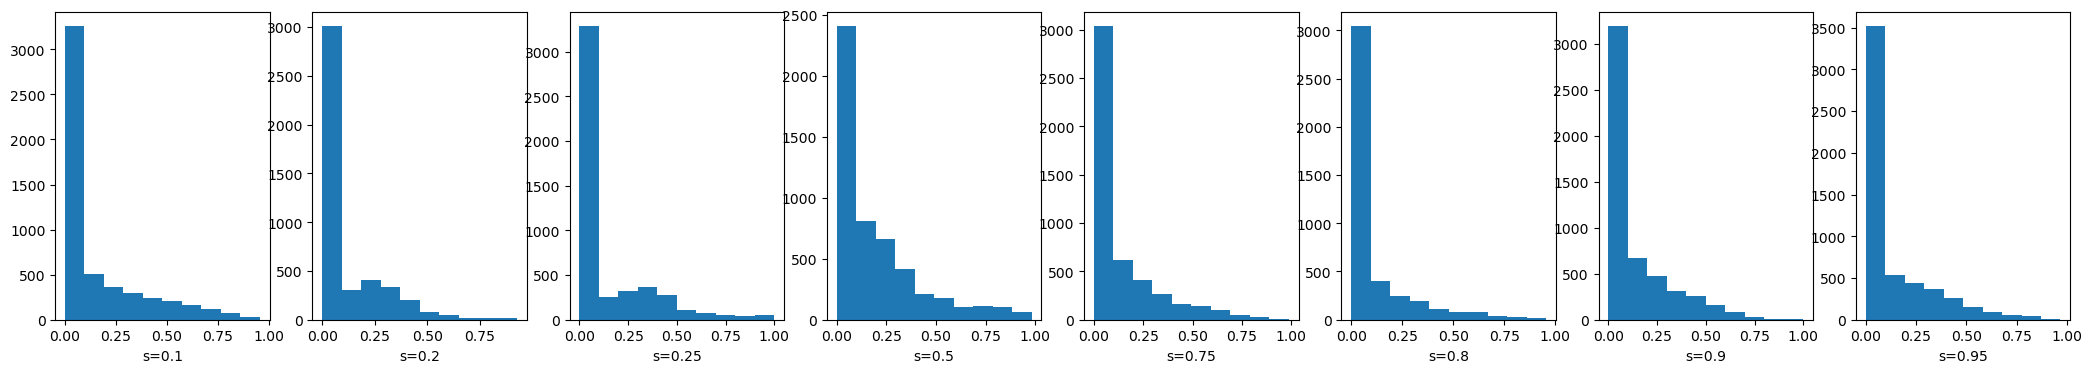

In [103]:
num_lin = []
fig ,ax = plt.subplots(1, 8, figsize=(26, 4))
for ind, s in enumerate([0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]):
    mts = pickle.load(open(f'/data3/wangkun/mtsim_res/240704/bifurcated_const/527821/mt_allmuts_const_0.1_527821_380_0.4_{s}_rs.pkl', 'rb'))
    mts = rs_cvt(mts)
    num_lin.append(len(set([i.split('>')[0]+'>' for i in mts.keys()])))
    freq = sparse_freq(mts)
    ax[ind].hist(freq.iloc[:,np.argsort(freq.mean().to_numpy())[-1]])
    ax[ind].set_xlabel(f'{s=}')

Text(0, 0.5, 'Number of lineages\nin 400th geeration')

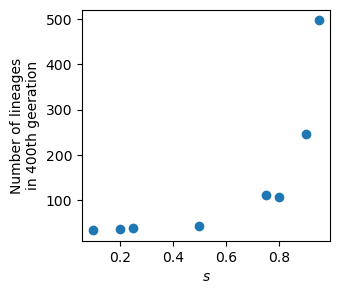

In [104]:
fig, ax = plt.subplots(figsize=(3.2,3))
ax.scatter([0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95], num_lin)
ax.set_xlabel('$s$')
ax.set_ylabel('Number of lineages\nin 400th geeration')

In [74]:
freq = sparse_freq(mts)

  0%|          | 0/5470 [00:00<?, ?it/s]

In [85]:
freq.mean()

0          1.075709e-02
1          4.436497e-03
3          8.999686e-02
4          1.224002e-01
5          8.985153e-02
               ...     
1625474    3.605826e-07
1625475    3.299916e-07
1625476    3.824589e-07
1625479    3.777177e-07
1625480    3.235670e-07
Length: 24522, dtype: float64

In [94]:
np.argsort(freq.mean())[-3:][::-1]

1625480    3
1625479    2
1625476    4
dtype: int64

In [88]:
help(freq.sort_index)

Help on method sort_index in module pandas.core.frame:

sort_index(*, axis: 'Axis' = 0, level: 'IndexLabel' = None, ascending: 'bool | Sequence[bool]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'NaPosition' = 'last', sort_remaining: 'bool' = True, ignore_index: 'bool' = False, key: 'IndexKeyFunc' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort object by labels (along an axis).
    
    Returns a new DataFrame sorted by label if `inplace` argument is
    ``False``, otherwise updates the original DataFrame and returns None.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
    level : int or level name or list of ints or list of level names
        If not None, sort on values in specified index level(s).
    ascending : bool or list-like of bools, default True
        So

(array([ 164.,  544.,  934., 1306., 1077.,  729.,  389.,  190.,   93.,
          44.]),
 array([0.00380952, 0.10342857, 0.20304762, 0.30266667, 0.40228571,
        0.50190476, 0.60152381, 0.70114286, 0.8007619 , 0.90038095,
        1.        ]),
 <BarContainer object of 10 artists>)

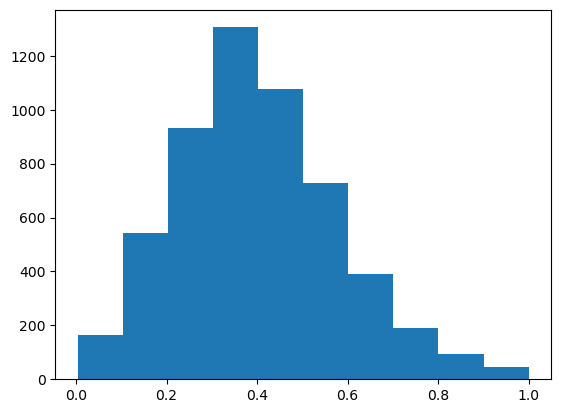

In [77]:
plt.hist(freq.max(1))